In [1]:
#standard imports
import pandas as pd
import numpy as np

#viualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#stats 
from scipy import stats

# from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer


#custom modules
import wrangle as w

#remove pink warning box
import warnings
warnings.filterwarnings('ignore')





In [2]:
train,val,test=w.wrangle_zillow_split()


       train  ----> (1284141, 7)
    validate  ----> (428047, 7)
        test  ----> (428047, 7)


In [3]:
train.head(3)

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
462820,5,4.0,3011,710674,2005,7561.14,Ventura
3880,3,2.0,1682,603333,1961,7086.19,LA
992263,4,2.0,1433,82804,1954,1134.83,LA


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284141 entries, 462820 to 778196
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   bedrooms        1284141 non-null  int64  
 1   bathrooms       1284141 non-null  float64
 2   area            1284141 non-null  int64  
 3   property_value  1284141 non-null  int64  
 4   yearbuilt       1284141 non-null  int64  
 5   taxamount       1284141 non-null  float64
 6   county          1284141 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 78.4+ MB



<div class="alert alert-block alert-success">
            
#    SCALING EXERCISES
            
</div>


<div class="alert alert-block alert-info">
            
#  Q1)Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution . 
            
</div>


In [5]:
train_scaled = train.copy()

In [6]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'property_value', 'yearbuilt',
       'taxamount', 'county'],
      dtype='object')

In [7]:
# make, fit, use:
# target variable (or property_value) and discrete variable(or yearbuilt) , eventhough they are numerical, 
# we wont scale them.
columns_to_scale = ['bedrooms', 'bathrooms','area','taxamount' ]
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [8]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'property_value', 'yearbuilt',
       'taxamount', 'county'],
      dtype='object')

In [9]:
train_scaled.columns

Index(['bedrooms', 'bathrooms', 'area', 'property_value', 'yearbuilt',
       'taxamount', 'county'],
      dtype='object')

In [11]:
train_scaled.head(4)

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
462820,0.277778,0.125000,0.005667,710674,2005,0.007001,Ventura
3880,0.166667,0.062500,0.003165,603333,1961,0.006561,LA
992263,0.222222,0.062500,0.002696,82804,1954,0.001040,LA
311722,0.166667,0.078125,0.003766,355444,1999,0.003860,Ventura


## histogram of 'bedrooms' with original data 'w/o scaled'

Text(0, 0.5, 'Count')

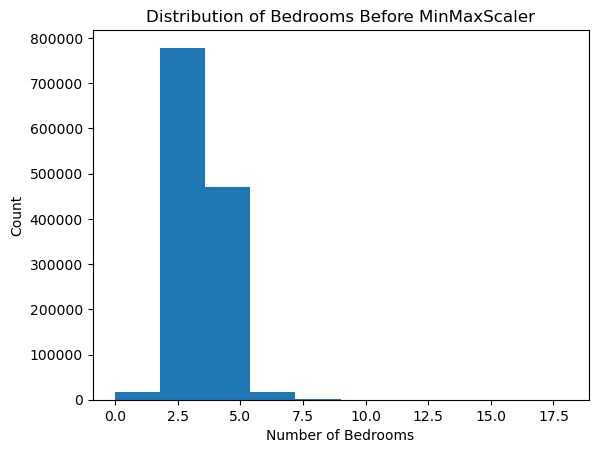

In [12]:
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

## histogram of 'bedrooms' with scaled

Text(0, 0.5, 'Count')

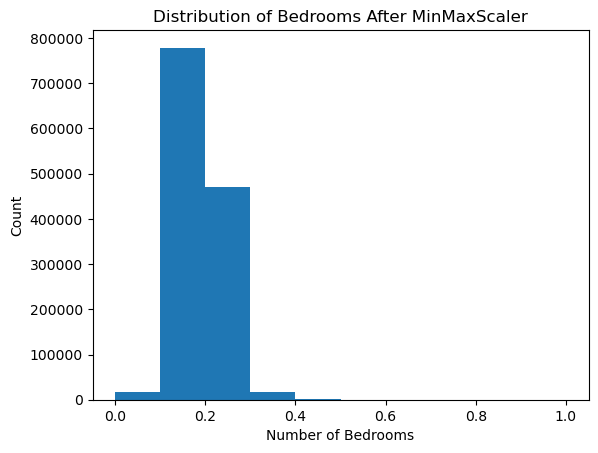

In [13]:
plt.hist(train_scaled.bedrooms)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [14]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

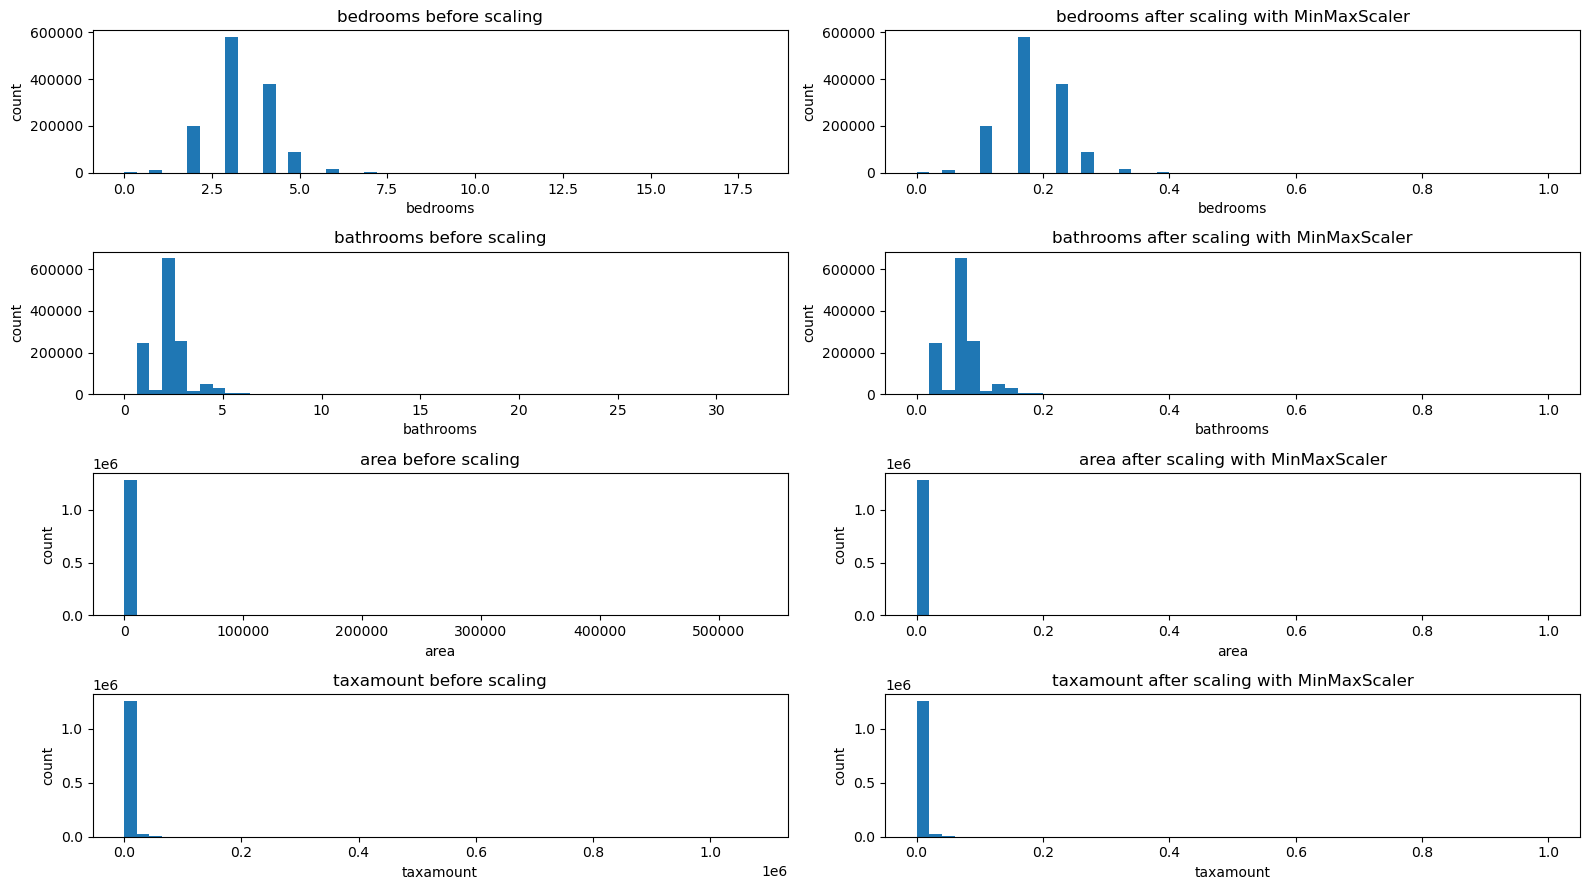

In [15]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

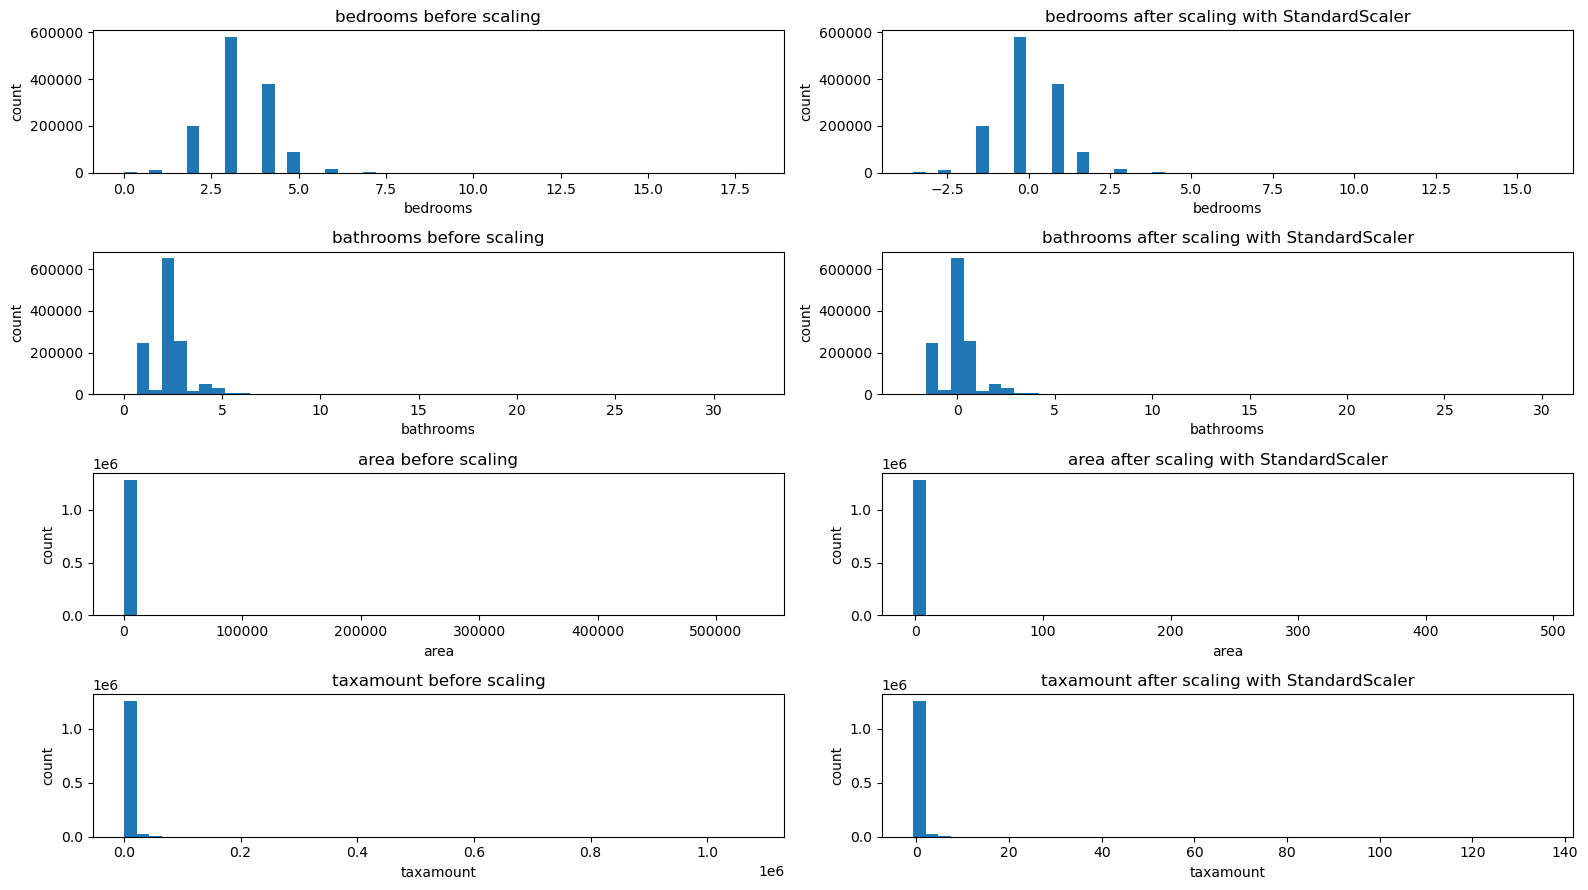

In [16]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)


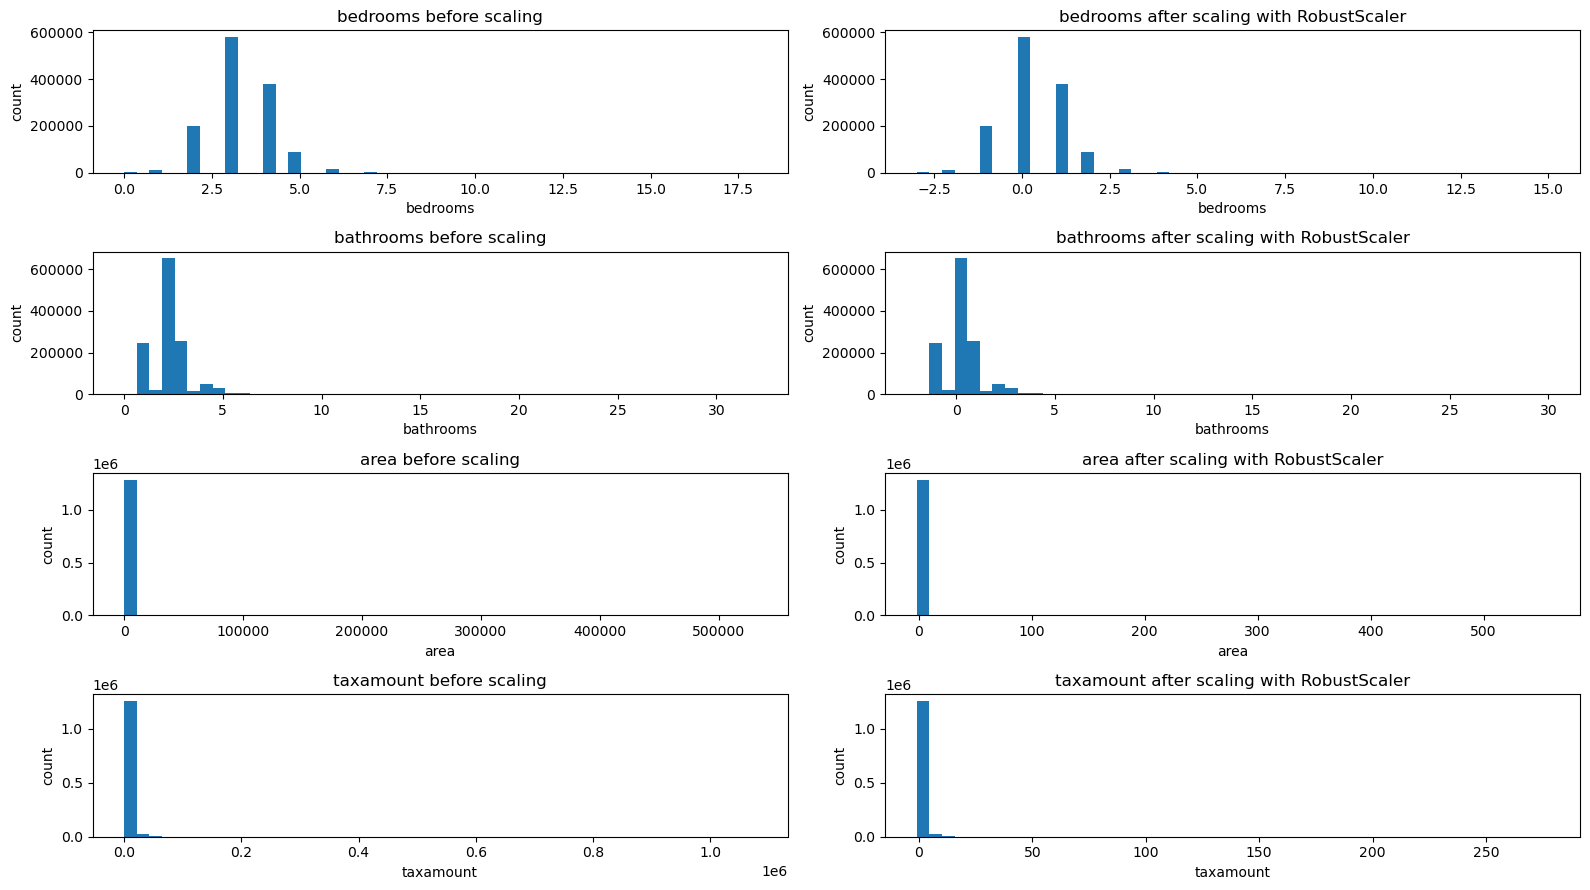

In [17]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)


<div class="alert alert-block alert-info">

#  Q2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?           
</div>

In [18]:
scaler = MinMaxScaler()
original_data = train[['taxamount']]
scaled_data = scaler.fit_transform(original_data)

In [19]:
scaled_data[:5]

array([[0.00700108],
       [0.00656053],
       [0.00104024],
       [0.00386013],
       [0.00658541]])

In [20]:
original_data[:5]

,taxamount
462820,7561.14
3880,7086.19
992263,1134.83
311722,4174.92
787985,7113.02


In [21]:
scaler.inverse_transform(scaled_data)[:5]

array([[7561.14],
       [7086.19],
       [1134.83],
       [4174.92],
       [7113.02]])

<div class="alert alert-block alert-info">

#  Q3)Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.    
</div>

###  From sklearn.preprocessing.QuantileTransformer documentation:

This method transforms the features to follow a uniform or a normal distribution.

Therefore, for a given feature, this transformation tends to spread out the most frequent values. 

It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

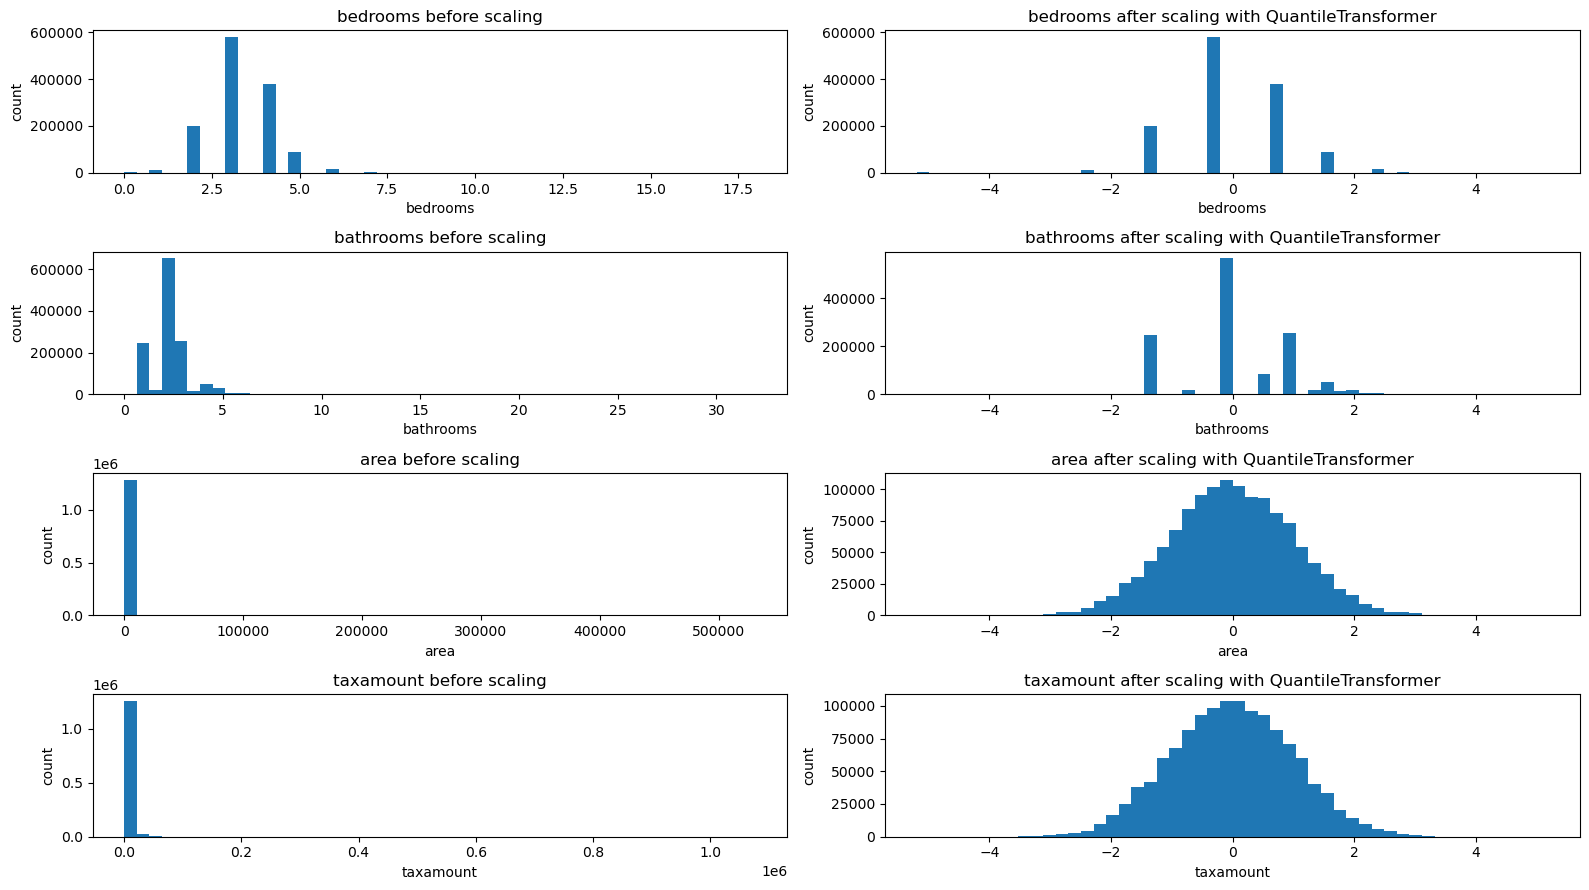

In [22]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

<div class="alert alert-block alert-info">

#  Q4)Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?    
</div>

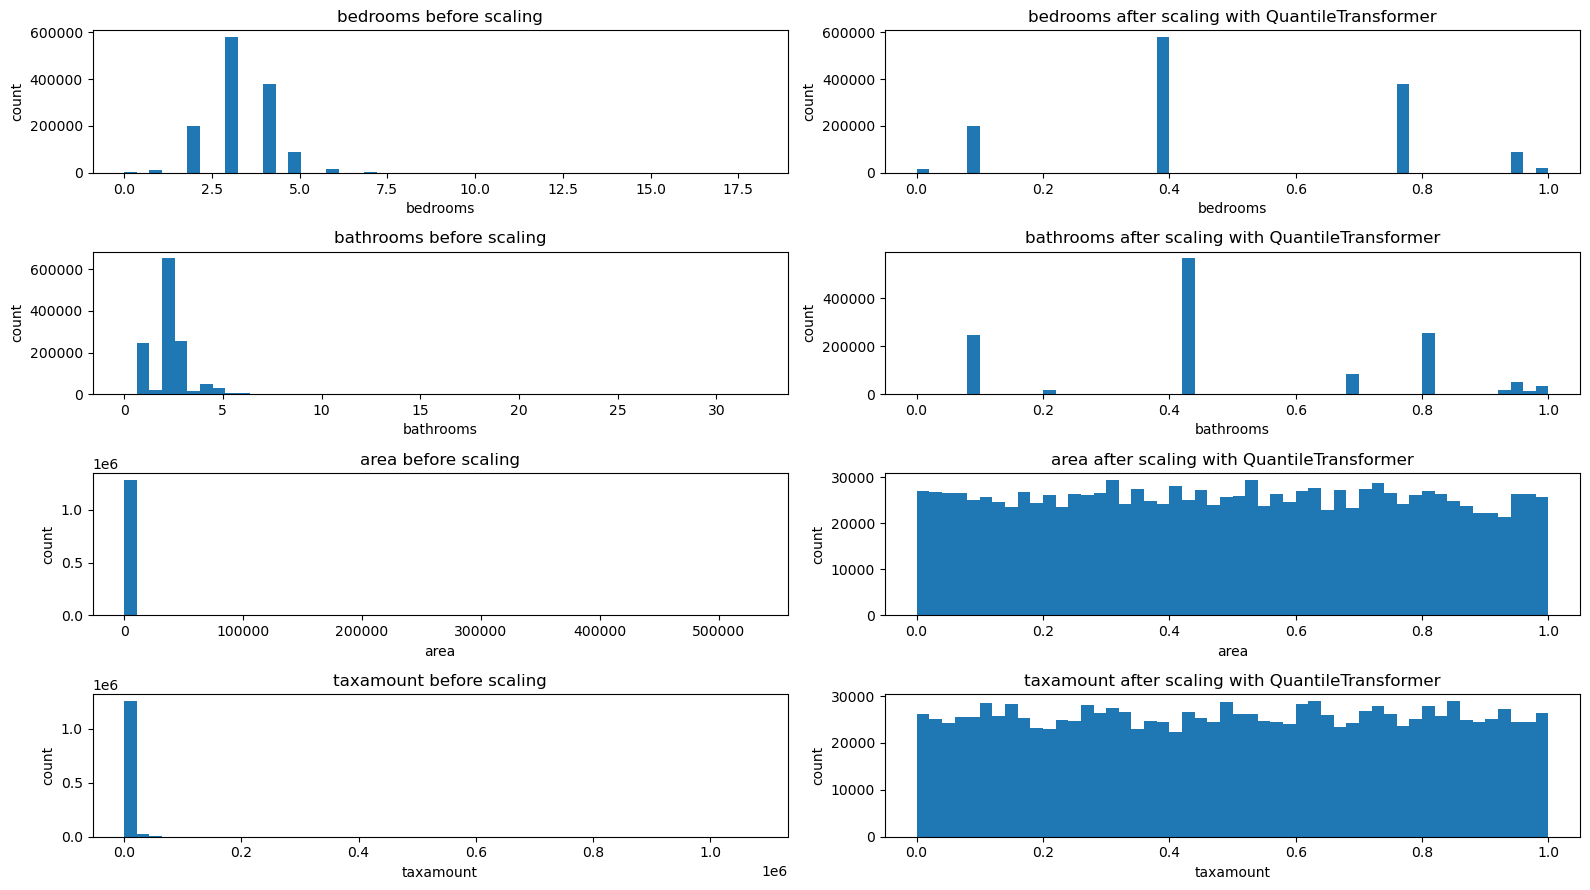

In [23]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(), # output_distribution='uniform' by default
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

<div class="alert alert-block alert-info">

#  Q5)Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!    
</div>

## Creating a Pipeline Function

In [24]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'area', 'taxamount'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    # make the thing
    scaler = MinMaxScaler()
    # fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                 columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                            columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                   columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [26]:
scaler,train_scaled,validate_scaled,test_scaled = scale_data(train, val, test, return_scaler=True)

In [27]:
scaler

MinMaxScaler()

In [28]:
train_scaled

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
462820,0.277778,0.125000,0.005667,710674,2005,0.007001,Ventura
3880,0.166667,0.062500,0.003165,603333,1961,0.006561,LA
992263,0.222222,0.062500,0.002696,82804,1954,0.001040,LA
311722,0.166667,0.078125,0.003766,355444,1999,0.003860,Ventura
787985,0.222222,0.062500,0.004285,571000,1962,0.006585,LA
...,...,...,...,...,...,...,...
1966409,0.166667,0.062500,0.002732,312978,1963,0.003706,LA
1248263,0.222222,0.093750,0.005033,417545,1979,0.003929,Orange
28211,0.277778,0.093750,0.003581,300584,1965,0.003628,LA
279547,0.222222,0.140625,0.006912,1115000,2001,0.012074,Orange


In [29]:
validate_scaled

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
553175,0.277778,0.125000,0.007334,2749023,1924,0.030702,LA
334836,0.222222,0.093750,0.003692,376865,1959,0.004416,LA
835173,0.222222,0.062500,0.003764,708000,1967,0.008090,LA
666536,0.222222,0.093750,0.002909,279285,1989,0.002583,Orange
1636553,0.166667,0.046875,0.002805,61572,1959,0.000852,Orange
...,...,...,...,...,...,...,...
564589,0.111111,0.031250,0.002071,333300,1938,0.003909,LA
545380,0.222222,0.062500,0.003643,478092,1977,0.005550,LA
818066,0.222222,0.062500,0.002563,167055,1954,0.001944,Orange
785346,0.166667,0.078125,0.003029,544439,1998,0.006054,Orange


In [30]:
test_scaled

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
1656157,0.222222,0.062500,0.003560,114668,1959,0.001440,Orange
1948549,0.111111,0.031250,0.002655,75656,1950,0.000801,Ventura
1691317,0.166667,0.062500,0.002250,406000,1953,0.009663,LA
1618983,0.222222,0.093750,0.004457,1441578,1936,0.015316,LA
1199756,0.222222,0.156250,0.006554,1277065,1965,0.013500,LA
...,...,...,...,...,...,...,...
196820,0.222222,0.062500,0.003178,144921,1959,0.001655,LA
311941,0.222222,0.140625,0.008492,1517000,2005,0.020777,Orange
1411076,0.277778,0.093750,0.005451,545210,1997,0.005487,Ventura
299892,0.166667,0.078125,0.005526,559434,1994,0.005784,Orange


In [33]:
# it doesnot give scaler returned
train_scaled_n,validate_scaled_n,test_scaled_n = scale_data(train, val, test, return_scaler=False) 


In [34]:
train_scaled_n

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
462820,0.277778,0.125000,0.005667,710674,2005,0.007001,Ventura
3880,0.166667,0.062500,0.003165,603333,1961,0.006561,LA
992263,0.222222,0.062500,0.002696,82804,1954,0.001040,LA
311722,0.166667,0.078125,0.003766,355444,1999,0.003860,Ventura
787985,0.222222,0.062500,0.004285,571000,1962,0.006585,LA
...,...,...,...,...,...,...,...
1966409,0.166667,0.062500,0.002732,312978,1963,0.003706,LA
1248263,0.222222,0.093750,0.005033,417545,1979,0.003929,Orange
28211,0.277778,0.093750,0.003581,300584,1965,0.003628,LA
279547,0.222222,0.140625,0.006912,1115000,2001,0.012074,Orange


In [35]:
validate_scaled_n

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
553175,0.277778,0.125000,0.007334,2749023,1924,0.030702,LA
334836,0.222222,0.093750,0.003692,376865,1959,0.004416,LA
835173,0.222222,0.062500,0.003764,708000,1967,0.008090,LA
666536,0.222222,0.093750,0.002909,279285,1989,0.002583,Orange
1636553,0.166667,0.046875,0.002805,61572,1959,0.000852,Orange
...,...,...,...,...,...,...,...
564589,0.111111,0.031250,0.002071,333300,1938,0.003909,LA
545380,0.222222,0.062500,0.003643,478092,1977,0.005550,LA
818066,0.222222,0.062500,0.002563,167055,1954,0.001944,Orange
785346,0.166667,0.078125,0.003029,544439,1998,0.006054,Orange


In [36]:
test_scaled_n

,bedrooms,bathrooms,area,property_value,yearbuilt,taxamount,county
1656157,0.222222,0.062500,0.003560,114668,1959,0.001440,Orange
1948549,0.111111,0.031250,0.002655,75656,1950,0.000801,Ventura
1691317,0.166667,0.062500,0.002250,406000,1953,0.009663,LA
1618983,0.222222,0.093750,0.004457,1441578,1936,0.015316,LA
1199756,0.222222,0.156250,0.006554,1277065,1965,0.013500,LA
...,...,...,...,...,...,...,...
196820,0.222222,0.062500,0.003178,144921,1959,0.001655,LA
311941,0.222222,0.140625,0.008492,1517000,2005,0.020777,Orange
1411076,0.277778,0.093750,0.005451,545210,1997,0.005487,Ventura
299892,0.166667,0.078125,0.005526,559434,1994,0.005784,Orange
